# Reddit EDA

## Import dependencies

In [1]:
import pandas as pd
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt

import pickle # just in case

## Set file locations

In [2]:
# File for cleaned comment data (input file)
cleaned_reddit_comments = '../00_data/reddit_data/reddit_comments_cleaned.csv'

# File for preprocessed comment text (input file)
cleaned_comment_text = '../00_data/reddit_data/reddit_comment_text_cleaned.csv'

# File for post data (input file)
reddit_posts = '../00_data/reddit_data/reddit_posts.csv'

## Read in the data

In [3]:
df = pd.read_csv(cleaned_comment_text)

In [4]:
df.head()

,comment_id,comment,clean_text
0,gpcqm3a,My super conservative Southern Baptist MIL is ...,my super conservative southern baptist mil is ...
1,gonzgvg,Had a nurse claim the vaccine wasn’t real and ...,had a nurse claim the vaccine wasn’t real and ...
2,gobfxvn,"Not an interaction with an antivaxxer, but jus...",not an interaction with an antivaxxer but just...
3,gobey4f,My grandfather is a Trump-supporting conspirac...,my grandfather is a trumpsupporting conspiracy...
4,go92rh9,"My anti vaxx, anti mask aunt keeps posting on ...",my anti vaxx anti mask aunt keeps posting on o...


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  1911 non-null   object
 1   comment     1911 non-null   object
 2   clean_text  1910 non-null   object
dtypes: object(3)
memory usage: 44.9+ KB


In [6]:
df.fillna(value=' ', inplace=True)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  1911 non-null   object
 1   comment     1911 non-null   object
 2   clean_text  1911 non-null   object
dtypes: object(3)
memory usage: 44.9+ KB


## Sentiment analysis (by comment)

In [8]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['clean_text'].apply(pol)
df['subjectivity'] = df['clean_text'].apply(sub)
df

,comment_id,comment,clean_text,polarity,subjectivity
0,gpcqm3a,My super conservative Southern Baptist MIL is ...,my super conservative southern baptist mil is ...,0.029167,0.359167
1,gonzgvg,Had a nurse claim the vaccine wasn’t real and ...,had a nurse claim the vaccine wasn’t real and ...,-0.156111,0.451111
2,gobfxvn,"Not an interaction with an antivaxxer, but jus...",not an interaction with an antivaxxer but just...,0.223864,0.486258
3,gobey4f,My grandfather is a Trump-supporting conspirac...,my grandfather is a trumpsupporting conspiracy...,-0.419643,0.616071
4,go92rh9,"My anti vaxx, anti mask aunt keeps posting on ...",my anti vaxx anti mask aunt keeps posting on o...,0.083333,0.538889
...,...,...,...,...,...
1906,gpdfjo6,My county has about 25% more vaccinated person...,my county has about 25 more vaccinated persons...,0.500000,0.500000
1907,gphl9yr,..,,0.000000,0.000000
1908,gpjzg18,So this location is trying to vaccine about 4k...,so this location is trying to vaccine about 4k...,0.000000,0.000000
1909,gpfbdj4,If you’re not at risk get in line,if you’re not at risk get in line,0.000000,0.000000


In [9]:
### Merge back on large set

In [10]:
df.drop('comment', axis=1, inplace=True)

In [11]:
new_df = pd.read_csv(cleaned_reddit_comments)

In [12]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   post_id             1911 non-null   object 
 1   comment_id          1911 non-null   object 
 2   author              1911 non-null   object 
 3   comment             1911 non-null   object 
 4   created_utc         1911 non-null   float64
 5   downs               1911 non-null   float64
 6   ups                 1911 non-null   float64
 7   reply               1911 non-null   object 
 8   comment_replied_id  214 non-null    object 
 9   comment_date        1911 non-null   object 
dtypes: float64(3), object(7)
memory usage: 149.4+ KB


In [13]:
new_df = new_df.merge(df, how='left', on='comment_id')

In [14]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 0 to 1910
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   post_id             1911 non-null   object 
 1   comment_id          1911 non-null   object 
 2   author              1911 non-null   object 
 3   comment             1911 non-null   object 
 4   created_utc         1911 non-null   float64
 5   downs               1911 non-null   float64
 6   ups                 1911 non-null   float64
 7   reply               1911 non-null   object 
 8   comment_replied_id  214 non-null    object 
 9   comment_date        1911 non-null   object 
 10  clean_text          1911 non-null   object 
 11  polarity            1911 non-null   float64
 12  subjectivity        1911 non-null   float64
dtypes: float64(5), object(8)
memory usage: 209.0+ KB


array([[<AxesSubplot:title={'center':'polarity'}>]], dtype=object)

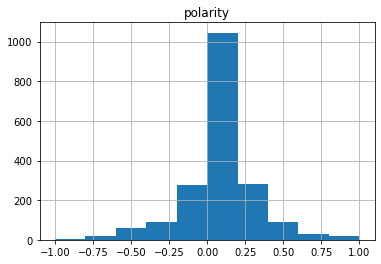

In [15]:
new_df.hist(column = 'polarity')

array([[<AxesSubplot:title={'center':'subjectivity'}>]], dtype=object)

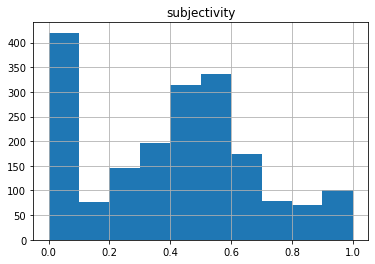

In [16]:
new_df.hist(column = 'subjectivity')

<AxesSubplot:xlabel='subjectivity', ylabel='polarity'>

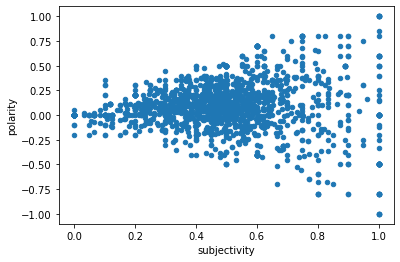

In [17]:
new_df.plot.scatter(x='subjectivity', y='polarity')

### Sentiment analysis (by subreddit)

In [18]:
### Add the subreddit

In [19]:
post_df = pd.read_csv(reddit_posts)

In [20]:
post_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   post_id                215 non-null    object 
 1   subreddit              215 non-null    object 
 2   title                  215 non-null    object 
 3   ups                    215 non-null    int64  
 4   downs                  215 non-null    int64  
 5   upvote_ratio           215 non-null    float64
 6   num_comments           215 non-null    int64  
 7   author                 215 non-null    object 
 8   created_utc            215 non-null    float64
 9   subreddit_subscribers  215 non-null    int64  
 10  post_date              215 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 18.6+ KB


In [21]:
new_df = new_df.merge(post_df[['post_id', 'subreddit']], how='left', on='post_id')

In [22]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 0 to 1910
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   post_id             1911 non-null   object 
 1   comment_id          1911 non-null   object 
 2   author              1911 non-null   object 
 3   comment             1911 non-null   object 
 4   created_utc         1911 non-null   float64
 5   downs               1911 non-null   float64
 6   ups                 1911 non-null   float64
 7   reply               1911 non-null   object 
 8   comment_replied_id  214 non-null    object 
 9   comment_date        1911 non-null   object 
 10  clean_text          1911 non-null   object 
 11  polarity            1911 non-null   float64
 12  subjectivity        1911 non-null   float64
 13  subreddit           1911 non-null   object 
dtypes: float64(5), object(9)
memory usage: 223.9+ KB


In [23]:
grouping_df = new_df[['subreddit', 'clean_text']].copy()

In [24]:
grouping_df['clean_text'] = new_df[['subreddit', 'clean_text']].groupby('subreddit')['clean_text'].transform(lambda x: ','.join(x))
grouping_df.drop_duplicates(inplace=True)

In [25]:
grouping_df.reset_index(drop=True, inplace=True)

In [26]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

grouping_df['polarity'] = grouping_df['clean_text'].apply(pol)
grouping_df['subjectivity'] = grouping_df['clean_text'].apply(sub)
grouping_df

,subreddit,clean_text,polarity,subjectivity
0,vaxxhappened,my super conservative southern baptist mil is ...,0.045114,0.472760
1,Conservative,ah so this is how they intend to keep the viru...,0.005768,0.520145
2,COVID19,for further questions and discussion please us...,0.116793,0.420199
3,CovidVaccinated,official cdc information about vaccination sid...,0.081963,0.412912
4,nashville,"god save the queen,i love that she had a spark...",0.169103,0.520065
5,FloridaCoronavirus,gov ron desantis quietly expanded covid19 vacc...,0.052150,0.469802
6,CoronavirusMa,yes vaccines in arms is number one most import...,0.096398,0.474717
7,news,"the social media effect is real,what is going ...",0.082085,0.505415
8,CoronavirusMichigan,good good now my local riteaid can run out of ...,0.086913,0.462940
9,nyc,best time to shop at macys was at 3am that one...,0.110168,0.466267


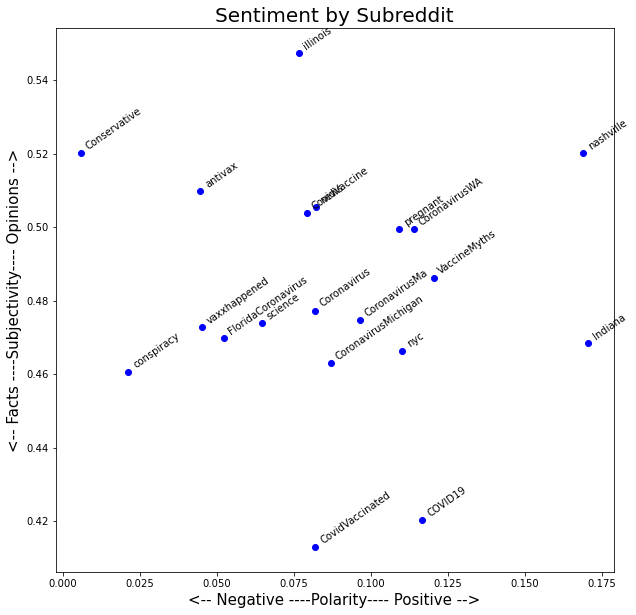

In [27]:
plt.rcParams['figure.figsize'] = [10, 10]

for index, subreddit in enumerate(grouping_df.index):
    x = grouping_df.polarity.loc[subreddit]
    y = grouping_df.subjectivity.loc[subreddit]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, grouping_df['subreddit'][index], fontsize=10, rotation=35)
#     plt.ylim(0, 1) 
#     plt.xlim(-1, 1) 

    
plt.title('Sentiment by Subreddit', fontsize=20)
plt.xlabel('<-- Negative ----Polarity---- Positive -->', fontsize=15)
plt.ylabel('<-- Facts ----Subjectivity---- Opinions -->', fontsize=15)

plt.show()

## Upvotes/Downvotes

<AxesSubplot:xlabel='ups', ylabel='downs'>

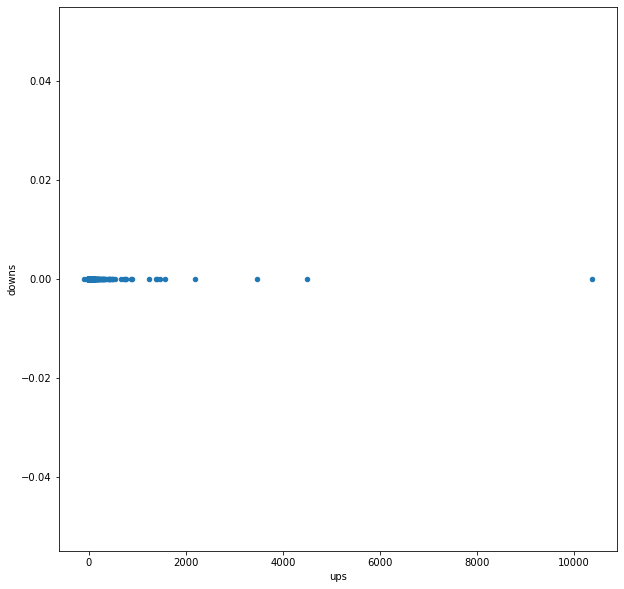

In [28]:
new_df.plot.scatter(x='ups', y='downs')

Looks like we'll only be looking at 'ups'.''

array([[<AxesSubplot:title={'center':'ups'}>]], dtype=object)

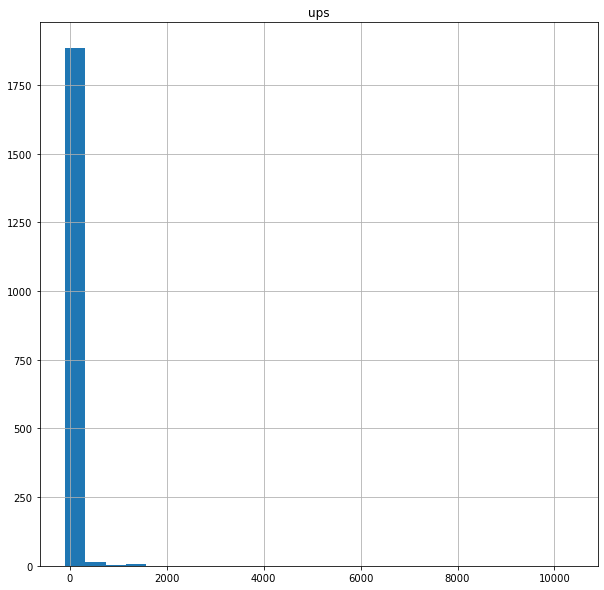

In [29]:
new_df.hist('ups', bins=25)

array([[<AxesSubplot:title={'center':'ups'}>]], dtype=object)

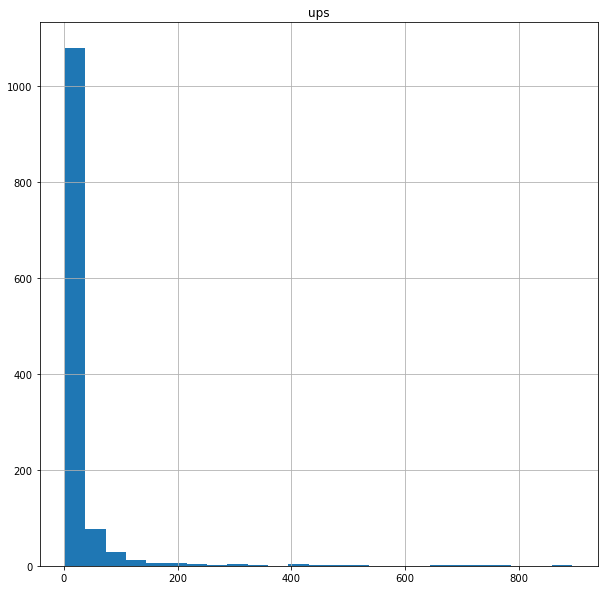

In [30]:
new_df[(new_df['ups'] > 1) & (new_df['ups'] <= 1000)].hist('ups', bins=25)

array([[<AxesSubplot:title={'center':'ups'}>]], dtype=object)

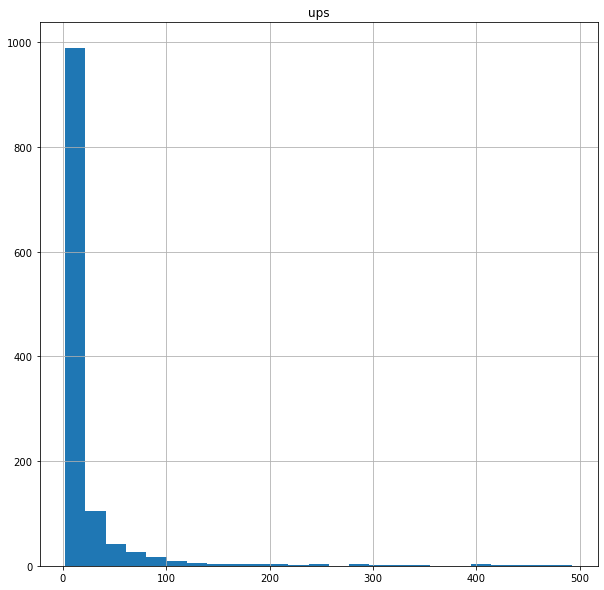

In [31]:
new_df[(new_df['ups'] > 1) & (new_df['ups'] <= 500)].hist('ups', bins=25)

array([[<AxesSubplot:title={'center':'ups'}>]], dtype=object)

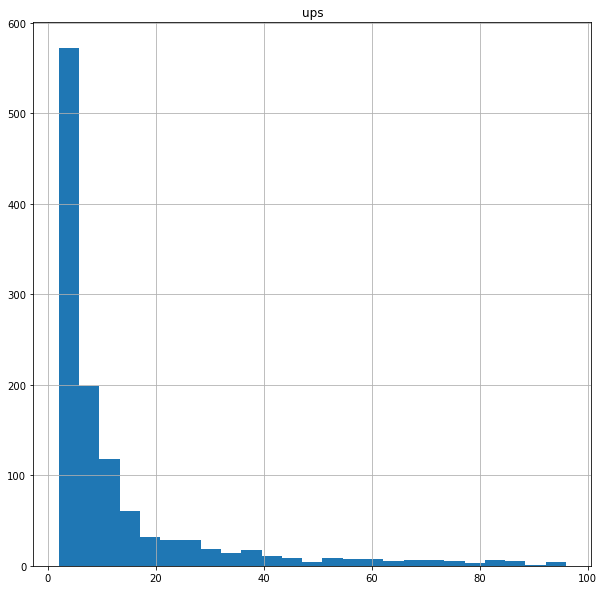

In [32]:
new_df[(new_df['ups'] > 1) & (new_df['ups'] <= 100)].hist('ups', bins=25)

<AxesSubplot:xlabel='polarity', ylabel='ups'>

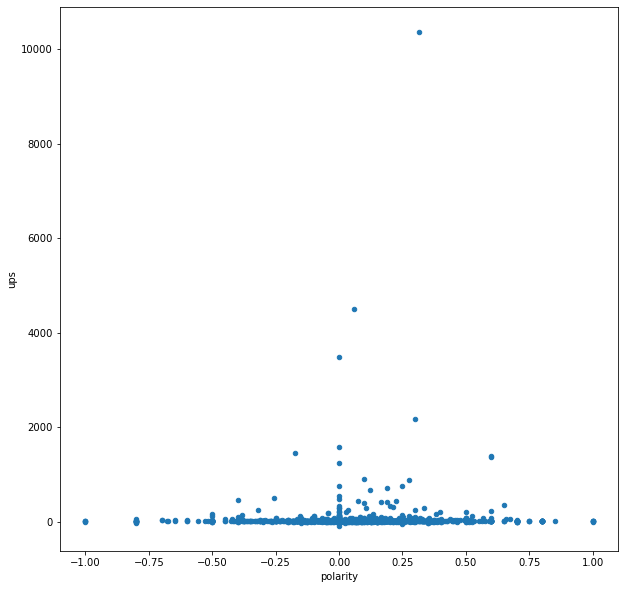

In [33]:
new_df.plot.scatter(x='polarity', y='ups')

<AxesSubplot:xlabel='subjectivity', ylabel='ups'>

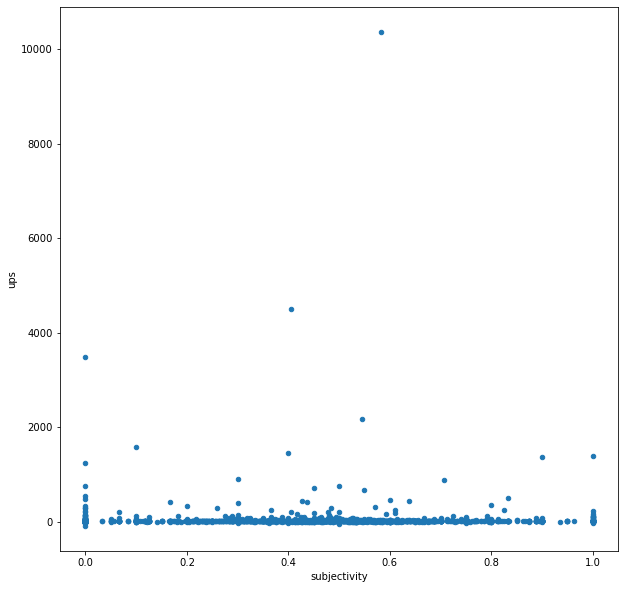

In [34]:
new_df.plot.scatter(x='subjectivity', y='ups')

In [35]:
new_df[new_df['ups'] > 10000]['clean_text'].values

array(['cool can’t wait til this subreddit is dead edit stop giving me awards lol'],
      dtype=object)

Observation: This post has the most upvotes in the dataset. For context, it is in the r/Coronavirus subreddit.

In [36]:
new_df[(new_df['ups'] > 1000) & (new_df['ups'] <= 10000)]['clean_text'].values

array(['or and hear me out on this apple can use your phone to harvest data on human processes',
       'i cannot wait for that day when we turn the corner and i dont have to wear a mask at work for 8 hours then the roaring 20s can start again',
       'just so everyone is clear this means we will have enough doses to vaccinate everyone not that we will have everyone vaccinated still great news though',
       'i can see why everyone was ready to party during the 1920s coming down from the first world war and a deadly flu pandemic… people must have been ready to do something that didn’t involve life and death for a change',
       'we are almost there this summer is going to be spectacular',
       'twice postponed wedding is schedule for june let’s go',
       'underpromise overperform a nice change from a series of lies excuses and shrugs',
       'i dont mind wearing a mask and do whenever required but i cannot wait for the day to come that i no longer need to im hoping by the end o

In [37]:
new_df[(new_df['ups'] > 500) & (new_df['ups'] <= 1000)]['clean_text'].values

array(['we are and remain the luckiest humans who ever lived a hundred generations died of smallpox and whooping cough and tetanus and measles never hearing of a vaccine most having no idea such a miracle could exist',
       'a consolation prize given that today 2 governors prematurely ended their states phased reopenings and mask mandates',
       'well why not they can open on their own terms right id be more likely to go there than a place thats not taking some precautions',
       'hopefully in the next two months well see the tiers of vaccination opening up fast it seems weve been stuck at 65 for ages',
       'if i said to myself few months ago i would be coming to this sub to get good news id call myself crazy this is great and works as expected though',
       'more and more everyday it feels like we’ll be back to normal sometime this summer',
       'are you telling me that science works not conspiracies and misinformation'],
      dtype=object)

In [38]:
new_df[(new_df['ups'] > 100) & (new_df['ups'] <= 500)]['clean_text'].values

array(['after a very long conversation with a gentleman who is antivaxx on a local news page because “the covid vaccine is experimental and takes more than one dose so it’s obviously a conspiracy” and “we can’t even get the flu vaccine right” i went on to educate him about how most vaccines take more than one dose and how the flu works this was his response more herehttpsimgurcomgallerywplcn85 eta to be clear both of these comments are from him apparently i am the one “parroting narratives”',
       'imagine calling someone a nurse as an insult lmao',
       'well i certainly don’t believe it',
       'imagine using the information harvesting tracking device to post about how they want to inject another one',
       'did everybody clap was that young man namedalbert einstein did the beer fill in the cracks and he said “there’s always room for a little beer with friends”',
       'he’s not a very good secrets employee if he just tells all of apple’s secrets to a random person at a resta